<a href="https://colab.research.google.com/github/ismael-rtellez/SVM_Classifier_Sprint/blob/main/SVM_Classifier_Sprint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machine Classifier Sprint
---

> ## [Problem 1-3] Implement ScratchSVMClassifier
---

* 【problem 1】Lagrange’s steepest descent by the undetermined multiplier method
* 【problem 2】Support vector determination
* 【problem 3】Estimated

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
class ScratchSVMClassifier():
    """
    Scratch implementation of SVM classifier

    Parameters
    ----------
    num_iter : int
      Number of iterations
    lr : float
      Learning rate
    kernel : str
      Kernel type. Linear kernel (linear) or polynomial kernel (polly)
    threshold : float
      Threshold for choosing a support vector
    verbose : bool
      True to output the learning process

    Attributes
    ----------
    self.n_support_vectors : int
      Number of support vectors
    self.index_support_vectors : The following form of ndarray, shape (n_support_vectors,)
      Support vector index
    self.X_sv :  The following forms of ndarray, shape (n_support_vectors, n_features)
      Support vector features
    self.lam_sv :  The following forms of ndarray, shape (n_support_vectors, 1)
      Support vector undetermined multiplier
    self.y_sv :  The following forms of ndarray, shape (n_support_vectors, 1)
      Support vector label

    """

    def __init__(self, num_iter, lr, kernel='linear', threshold=1e-5, verbose=False):
        # Record hyperparameters as attributes
        self.iter = num_iter
        self.lr = lr
        self.kernel = kernel
        self.threshold = threshold
        self.verbose = verbose

    def fit(self, X, y, X_val=None, y_val=None):
        """
        Learn the SVM classifier. If verification data is input, the accuracy for it is also calculated for each iteration.

        Parameters
        ----------
        X : of the following form. ndarray, shape (n_samples, n_features)
            Features of training data
        y : The following form of ndarray, shape (n_samples,)
            Correct answer value of training data
        X_val : of the following form. ndarray, shape (n_samples, n_features)
            Features of verification data
        y_val : The following form of ndarray, shape (n_samples,)
            Correct value of verification data
        """
        n_samples, _ = X.shape
        self.lambdas = np.zeros(n_samples)

        for it in range(self.iter):
            self._gradient_descent_step(X, y)

            if self.verbose and it % 10 == 0:
                print(f"Iteración {it}, sum(lambdas)={np.sum(self.lambdas):.4f}")

        # Select support vectors
        self._select_support_vectors(X, y)

    def predict(self, X):
        """
        Estimate the label using the SVM classifier.

        Parameters
        ----------
        X : of the following form. ndarray, shape (n_samples, n_features)
            sample

        Returns
        -------
            The following form of ndarray, shape (n_samples, 1)
            Estimated result by SVM classifier
        """

        y_pred = []
        for x in X:
            val = np.sum([
                self.lam_sv[i] * self.y_sv[i] * self._kernel(x, self.X_sv[i])
                for i in range(self.n_support_vectors)
            ])
            y_pred.append(np.sign(val))
        return np.array(y_pred)


    def _gradient_descent_step(self, X, y):
        """
        A step of updating λ with gradient descent
        """
        n_samples = X.shape[0]
        for i in range(n_samples):
            # Update formula for λ
            condition = 1 - np.sum([
                self.lambdas[j] * y[i] * y[j] * self._kernel(X[i], X[j])
                for j in range(n_samples)
            ])
            self.lambdas[i] += self.lr * condition

            # Restriction λ_i >= 0
            if self.lambdas[i] < 0:
                self.lambdas[i] = 0


    def _select_support_vectors(self, X, y):
        """
        Determinate the support vectors after training
        """
        idx_sv = self.lambdas > self.threshold
        self.index_support_vectors = np.where(idx_sv)[0]
        self.X_sv = X[idx_sv]
        self.y_sv = y[idx_sv]
        self.lam_sv = self.lambdas[idx_sv]
        self.n_support_vectors = len(self.lam_sv)

    def _kernel(self, x1, x2):
        """Linear core function"""
        return np.dot(x1, x2)

## [Problem 4] Learning and estimation

In [21]:
from sklearn.datasets import load_iris

X = pd.DataFrame(data=load_iris().data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
y = pd.DataFrame(load_iris().target, columns=[('Species')])
df = pd.concat([X, y], axis=1)
df = df[["sepal_length", "petal_length", "Species"]][df['Species']!=0]

X = df[["sepal_length", "petal_length"]].values
y = df['Species'].values
y = np.where(y == 1, -1, 1)

print("Shape de X:", X.shape)
print("Clases únicas en y:", np.unique(y))

Shape de X: (100, 2)
Clases únicas en y: [-1  1]


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(75, 2) (75,) (25, 2) (25,)


In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluation(test, predict):
    accuracy = accuracy_score(test, predict)
    precision = precision_score(test, predict)
    recall = recall_score(test, predict)
    F1 = f1_score(test, predict)
    conf_matrix = confusion_matrix(test, predict)
    print('Accuracy : {:.3f}'.format(accuracy))
    print('Precision: {:.3f}'.format(precision))
    print('Recall   : {:.3f}'.format(recall))
    print('F1       : {:.3f}'.format(F1))
    print('Confussion Matrix:\n', conf_matrix)

In [24]:
# Scracth SVM learning

svm = ScratchSVMClassifier(num_iter=200, lr=0.01, verbose=True)
svm.fit(X_train_scaled, y_train, X_test_scaled, y_test)
svm_predict = svm.predict(X_test_scaled)

pd.DataFrame([y_test, svm_predict], index=['Actual Value', 'Predict Value'])

Iteración 0, sum(lambdas)=0.5905
Iteración 10, sum(lambdas)=3.6132
Iteración 20, sum(lambdas)=5.7409
Iteración 30, sum(lambdas)=7.6237
Iteración 40, sum(lambdas)=9.3324
Iteración 50, sum(lambdas)=10.9912
Iteración 60, sum(lambdas)=12.6291
Iteración 70, sum(lambdas)=14.1879
Iteración 80, sum(lambdas)=15.6884
Iteración 90, sum(lambdas)=17.1237
Iteración 100, sum(lambdas)=18.5072
Iteración 110, sum(lambdas)=19.8537
Iteración 120, sum(lambdas)=21.1736
Iteración 130, sum(lambdas)=22.4788
Iteración 140, sum(lambdas)=23.7870
Iteración 150, sum(lambdas)=25.0935
Iteración 160, sum(lambdas)=26.3883
Iteración 170, sum(lambdas)=27.6828
Iteración 180, sum(lambdas)=28.9698
Iteración 190, sum(lambdas)=30.2434


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Actual Value,1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,...,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,-1.0
Predict Value,1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,-1.0


In [25]:
evaluation(y_test, svm_predict)

Accuracy : 0.920
Precision: 1.000
Recall   : 0.857
F1       : 0.923
Confussion Matrix:
 [[11  0]
 [ 2 12]]


## [Problem 5] Visualization of decision area

In [11]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='Decision Region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    Draw the determination area of the model that learned binary Classification with two-dimensional features.
    The background color is drawn from estimated values of the trained model.
    The points on the scatter plot are training or validation data.
    Parameters
    ----------
    X : ndarray, shape(n_samples, 2)
        Feature value
    y : ndarray, shape(n_samples,)
        label
    model : Object
        Insert the installed model of the learned model
    step : float, (default : 0.1)
        Set the interval to calculatethe estimate
    title : str
        Give the text of the graph title
    xlabel, ylabel : str
        Give the text of the axis label
    target_names : list of str
        Give a list of legend
    """
    # Settings
    scatter_color = ['green', 'purple']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1 = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0), np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, color='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:,0], X[y==target][:,1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.scatter(model.X_sv[:, 0], model.X_sv[:, 1],
                s=100, facecolors='None', edgecolors='red', linewidth=2,
                label="Vectores de soporte")
    plt.legend()
    plt.show()

/tmp/ipython-input-1737989858.py:40: UserWarning: The following kwargs were not used by contour: 'color'
  plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, color='y', linewidths=3, alpha=0.5)


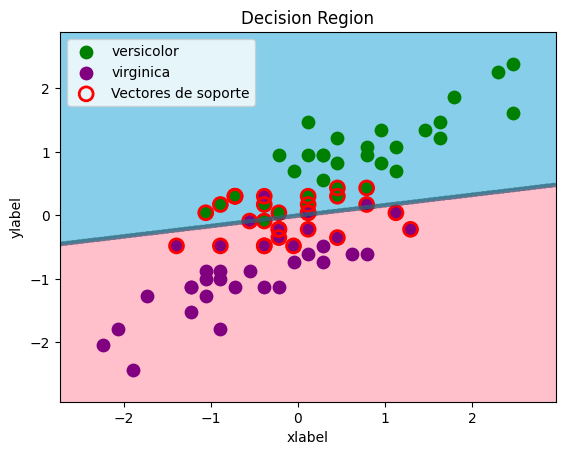

In [26]:
decision_region(X_train_scaled, y_train, svm)

## [Problem 6] (Advance task) Creation of polynomial kernel function

In [27]:
class ScratchSVMClassifierPoly():
    """
    Scratch implementation of SVM classifier

    Parameters
    ----------
    num_iter : int
      Number of iterations
    lr : float
      Learning rate
    kernel : str
      Kernel type. Linear kernel (linear) or polynomial kernel (polly)
    threshold : float
      Threshold for choosing a support vector
    verbose : bool
      True to output the learning process

    Attributes
    ----------
    self.n_support_vectors : int
      Number of support vectors
    self.index_support_vectors : The following form of ndarray, shape (n_support_vectors,)
      Support vector index
    self.X_sv :  The following forms of ndarray, shape (n_support_vectors, n_features)
      Support vector features
    self.lam_sv :  The following forms of ndarray, shape (n_support_vectors, 1)
      Support vector undetermined multiplier
    self.y_sv :  The following forms of ndarray, shape (n_support_vectors, 1)
      Support vector label

    """

    def __init__(self, num_iter, lr, kernel='linear', threshold=1e-5, verbose=False, gamma=1.0, theta0=1.0, degree=2):
        # Record hyperparameters as attributes
        self.iter = num_iter
        self.lr = lr
        self.kernel = kernel
        self.threshold = threshold
        self.verbose = verbose
        # Hiperparameters of kernel polynomial
        self.gamma = gamma
        self.theta0 = theta0
        self.degree = degree

    def fit(self, X, y, X_val=None, y_val=None):
        """
        Learn the SVM classifier. If verification data is input, the accuracy for it is also calculated for each iteration.

        Parameters
        ----------
        X : of the following form. ndarray, shape (n_samples, n_features)
            Features of training data
        y : The following form of ndarray, shape (n_samples,)
            Correct answer value of training data
        X_val : of the following form. ndarray, shape (n_samples, n_features)
            Features of verification data
        y_val : The following form of ndarray, shape (n_samples,)
            Correct value of verification data
        """
        n_samples, _ = X.shape
        self.lambdas = np.zeros(n_samples)

        for it in range(self.iter):
            self._gradient_descent_step(X, y)

            if self.verbose and it % 10 == 0:
                print(f"Iteración {it}, sum(lambdas)={np.sum(self.lambdas):.4f}")

        # Select support vectors
        self._select_support_vectors(X, y)

    def predict(self, X):
        """
        Estimate the label using the SVM classifier.

        Parameters
        ----------
        X : of the following form. ndarray, shape (n_samples, n_features)
            sample

        Returns
        -------
            The following form of ndarray, shape (n_samples, 1)
            Estimated result by SVM classifier
        """

        y_pred = []
        for x in X:
            val = np.sum([
                self.lam_sv[i] * self.y_sv[i] * self._kernel(x, self.X_sv[i])
                for i in range(self.n_support_vectors)
            ])
            y_pred.append(np.sign(val))
        return np.array(y_pred)


    def _gradient_descent_step(self, X, y):
        """
        A step of updating λ with gradient descent
        """
        n_samples = X.shape[0]
        for i in range(n_samples):
            # Update formula for λ
            condition = 1 - np.sum([
                self.lambdas[j] * y[i] * y[j] * self._kernel(X[i], X[j])
                for j in range(n_samples)
            ])
            self.lambdas[i] += self.lr * condition

            # Restriction λ_i >= 0
            if self.lambdas[i] < 0:
                self.lambdas[i] = 0


    def _select_support_vectors(self, X, y):
        """
        Determinate the support vectors after training
        """
        idx_sv = self.lambdas > self.threshold
        self.index_support_vectors = np.where(idx_sv)[0]
        self.X_sv = X[idx_sv]
        self.y_sv = y[idx_sv]
        self.lam_sv = self.lambdas[idx_sv]
        self.n_support_vectors = len(self.lam_sv)

    def _kernel(self, x1, x2):
        if self.kernel == 'linear':
            return np.dot(x1, x2)
        elif self.kernel == 'polynomial':
            return (self.gamma * np.dot(x1, x2) + self.theta0) ** self.degree
        else:
            raise ValueError("Unsupported Kernel")

In [43]:
# Scracth SVM Polynomial learning

svm_poly = ScratchSVMClassifierPoly(num_iter=200, lr=0.01, kernel="polynomial", verbose=True, gamma=1, degree=3, theta0=1)
svm_poly.fit(X_train_scaled, y_train, X_test_scaled, y_test)
svm_poly_predict = svm_poly.predict(X_test_scaled)

pd.DataFrame([y_test, svm_poly_predict], index=['Actual Value', 'Predict Value'])

Iteración 0, sum(lambdas)=0.4313
Iteración 10, sum(lambdas)=2.5459
Iteración 20, sum(lambdas)=4.1104
Iteración 30, sum(lambdas)=5.4755
Iteración 40, sum(lambdas)=6.7367
Iteración 50, sum(lambdas)=7.9372
Iteración 60, sum(lambdas)=9.1295
Iteración 70, sum(lambdas)=10.2975
Iteración 80, sum(lambdas)=11.4581
Iteración 90, sum(lambdas)=12.6279
Iteración 100, sum(lambdas)=13.8035
Iteración 110, sum(lambdas)=14.9511
Iteración 120, sum(lambdas)=16.0873
Iteración 130, sum(lambdas)=17.2189
Iteración 140, sum(lambdas)=18.3476
Iteración 150, sum(lambdas)=19.4884
Iteración 160, sum(lambdas)=20.6191
Iteración 170, sum(lambdas)=21.7399
Iteración 180, sum(lambdas)=22.8513
Iteración 190, sum(lambdas)=23.9541


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Actual Value,1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,...,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,-1.0
Predict Value,1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,-1.0


In [45]:
evaluation(y_test, svm_poly_predict)

Accuracy : 0.920
Precision: 1.000
Recall   : 0.857
F1       : 0.923
Confussion Matrix:
 [[11  0]
 [ 2 12]]


/tmp/ipython-input-1737989858.py:40: UserWarning: The following kwargs were not used by contour: 'color'
  plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, color='y', linewidths=3, alpha=0.5)


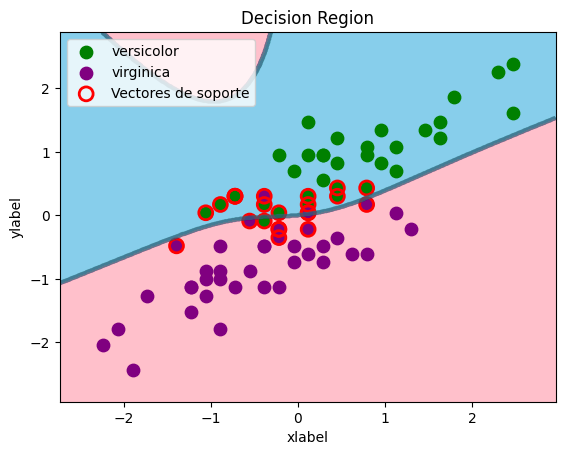

In [39]:
decision_region(X_train_scaled, y_train, svm_poly)